In [187]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [188]:
def load_data(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    print('Shape: ', data.shape)
    print('First row: ', data[1, :])
    
    return data

### 1.1 Visualizing the data

In [189]:
def plot_data(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Find indices of positive and negative examples
    pos = data[:,2] == 1
    neg = data[:,2] == 0
    
    # Plot examples
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], label=label_pos, marker='+', color='k', linewidth=2)
    axes.scatter(data[neg][:,0], data[neg][:,1], label=label_neg, marker='o', color='y')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

### 1.2.1 Warm-up: sigmoid function

In [190]:
data = load_data('./ex2data1.txt', ',')

Shape:  (100, 3)
First row:  [30.28671077 43.89499752  0.        ]


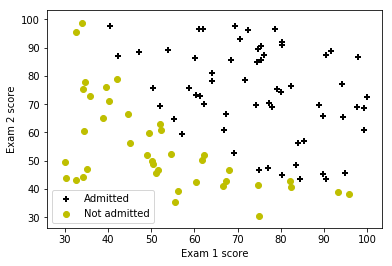

In [191]:
plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [192]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [193]:
def test_sigmoid():
    print(sigmoid(0))
    print(sigmoid(100))
    print(sigmoid(np.zeros(2)))

In [194]:
test_sigmoid()

0.5
1.0
[0.5 0.5]


### 1.2.2 Cost function and gradient

In [195]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

In [196]:
def cost_function(theta, X, y):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx)))
    
    return J

In [197]:
def gradient(theta, X, y):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    grad = (1/m)*((hx - y.T).dot(X))
    
    return grad.flatten()

In [198]:
theta = np.zeros((X.shape[1]))
cost = cost_function(theta, X, y)
grad = gradient(theta, X, y)

In [199]:
print(cost)
print(grad)

[0.69314718]
[ -0.1        -12.00921659 -11.26284221]


### 1.2.3 Learning parameters using fminunc

In [200]:
res = minimize(cost_function, theta, method='nelder-mead', args=(X,y), options={'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
 final_simplex: (array([[-25.16130062,   0.20623142,   0.20147143],
       [-25.16135807,   0.20623176,   0.20147199],
       [-25.1613519 ,   0.20623203,   0.20147171],
       [-25.16137971,   0.20623202,   0.20147188]]), array([0.2034977, 0.2034977, 0.2034977, 0.2034977]))
           fun: 0.2034977015902151
       message: 'Optimization terminated successfully.'
          nfev: 287
           nit: 157
        status: 0
       success: True
             x: array([-25.16130062,   0.20623142,   0.20147143])


In [201]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return (p.astepe('int'))

In [202]:
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762915904112411

In [215]:
def plot_decision_boundary(theta, X, y):
    # X is Mx3 matrix, where the first column is an all-ones column for the intercept.
    if (X.shape[1] <= 3):
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:,1])-2, np.max(X[:,1])+2])
        # Calculate the decision boundary line
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        plt.plot(plot_x, plot_y)
        plt.scatter(45, 85, c='r', s=20, label='(45, 85)')
        plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted', plt.gca())

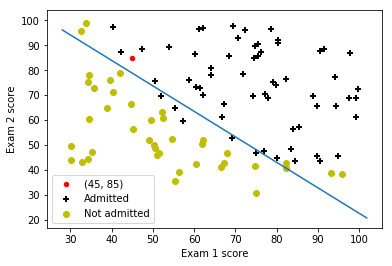

In [204]:
plot_decision_boundary(res.x, X, y)

### 2.1 Visualizing the data

In [205]:
data2 = load_data('./ex2data2.txt', ',')

Shape:  (118, 3)
First row:  [-0.092742  0.68494   1.      ]


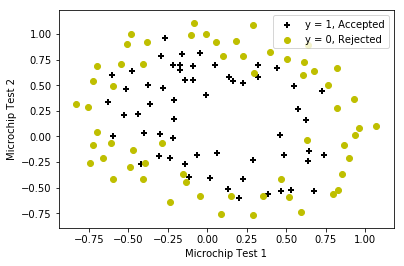

In [206]:
plot_data(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1, Accepted', 'y = 0, Rejected')

### 2.2 Feature Mapping

In [207]:
poly = PolynomialFeatures(6)
m_X = poly.fit_transform(data2[:,0:2])
y = np.c_[data2[:,2]]
print(m_X.shape)

(118, 28)


### 2.3 Cost function and gradient

In [208]:
def cost_function_reg(theta, X, y, lamb=1):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx))) + (lamb/(2*m))*np.sum(np.power(theta[1:],2))
    
    return J

In [209]:
theta = np.zeros((m_X.shape[1]))
lamb = 1
cost = cost_function_reg(theta, m_X, y, lamb)

In [210]:
print(cost)

[0.69314718]


### 2.3.1 Learning parameters using fminunc

In [211]:
res2 = minimize(cost_function_reg, theta, method='BFGS', args=(m_X,y), options={'disp': True})
print(res2)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48
      fun: 0.5290027422842983
 hess_inv: array([[ 1.07919622e+01,  1.00313747e+00,  1.20962816e+00,
        -8.74666571e+00, -2.24529037e+00, -1.30936902e+01,
         7.85406348e-01, -1.64625246e+00, -2.50293705e-01,
        -6.51637908e-01, -4.71858959e+00,  2.58011057e+00,
        -4.03208326e+00,  1.03049192e-01, -5.05479712e+00,
        -6.75567107e-02, -2.54847931e-02,  8.82612595e-01,
        -1.68378156e+00, -5.52076230e-01,  2.14317426e+00,
        -2.31085997e+00,  2.02994181e+00, -1.59299507e+00,
         1.32607883e+00, -1.98926458e+00,  2.80086684e-01,
         5.99000875e-01],
       [ 1.00313747e+00,  1.28893165e+01,  4.31871811e+00,
        -6.96019620e+00, -7.08218769e+00, -2.61157791e-03,
         1.69054193e+00,  7.18571708e-01,  2.99600743e+00,
        -3.00956695e+00, -3.78371445e+00, -2.071995

       -0.32759314, -0.143892  , -0.92460118])


### 2.4 Plotting the decision boundary

In [232]:
def plot_decision_boundary_poly(theta, data, y):
    x1_min, x1_max = data[:,0].min(), data[:,0].max(),
    x2_min, x2_max = data[:,1].min(), data[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1)
    plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1, Accepted', 'y = 0, Rejected', plt.gca())

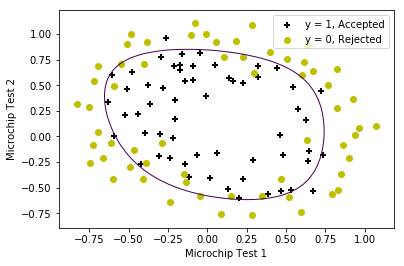

In [233]:
plot_decision_boundary_poly(res2.x, data2, y)